<h1>Math 350 Numerical Analysis Lab 2</h1>

<img src="https://acalog-clients.s3.amazonaws.com/production/dom/img/gateway/CV_DUstacked_PMS295.png" alt="Dominican University" id="logo" width="200">

<p>MATH 350 Numerical Analysis Lab #2, due <strong>Wednesday, April 23rd at 11:59 pm</strong>.</p>


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

from IPython.display import display, HTML
from matplotlib.animation import FuncAnimation

#### Prerequisites

We'll first define all the functions needed to compute the columns for problems [2–4]. These include the midpoint rule and Richardson's extrapolation.

__Midpoint Rule__:

$$
M_n(f) = h \left[ f\left(\frac{x_0 + x_1}{2}\right) + f\left(\frac{x_1 + x_2}{2}\right) + \cdots + f\left(\frac{x_{n-1} + x_n}{2}\right) \right]
$$

where:

- $ h = \frac{b - a}{n} $ is the width of each subinterval

__Richardson's Extrapolation__:

$$
R_{2n}(f) = \frac{2^p I_{2n} - I_n}{2^p - 1}
$$

where:

- $ I_n $ is the approximation using $ n $ subintervals  
- $ I_{2n} $ is the approximation using $ 2n $ subintervals  
- $p$ is the order of accuracy of the method ($r_m = 1$, thus $p = r_m + 1 \implies p = 2$ for the midpoint rule)

In [2]:
def midpoint_rule(fcn, a, b, n):
    h = np.multiply((b-a), np.divide(1.0, n))
    xs = [(a+h*i) for i in range(n+1)]
    ys_mid = [fcn((np.divide((xs[i] + xs[i+1]), 2))) for i in range(n)]
    return h * sum(ys_mid)

In [3]:
def trapezoid_rule(fcn, a, b, n):
    h = np.multiply((b-a), np.divide(1.0, n))
    integral_sum = fcn(a) + fcn(b)
    xs = [(a+h*i) for i in range(1, n)]
    center_sum = [(2*fcn(x)) for x in xs]

    return (h/2) * (integral_sum + sum(center_sum))

In [4]:
def simpsons_rule(fcn, a, b, n):
    h = np.multiply((b-a), np.divide(1.0, n))
    integral_sum = fcn(a) + fcn(b)
    xs_1 = [(a+h*i) for i in range(1, n, 2)]
    xs_2 = [(a+h*i) for i in range(2, n-1, 2)]
    center_sum_1 = [(4*fcn(x)) for x in xs_1]
    center_sum_2 = [(2*fcn(x)) for x in xs_2]

    return (h/3) * (integral_sum + sum(center_sum_1) + sum(center_sum_2))

In [5]:
def richardsons_extrapolation(method, fcn, a, b, n, r):
    p = r + 1
    i_2_n = method(fcn, a, b, n*2)
    i_n = method(fcn, a, b, n)

    numerator = (np.pow(2, p) * i_2_n) - i_n
    denominator = np.pow(2, p) - 1

    return np.divide(numerator, denominator)

In [6]:
def lab_function(x):
    return np.divide(25, np.pow(x, 2))

def lab_function_p(x):
    return -1 * np.divide(50, np.pow(x, 3))

def lab_function_dp(x):
    return np.divide(150, np.pow(x,4))

def lab_function_tp(x):
    return -1 * np.divide(600, np.pow(x, 5))

In [7]:
def asymptotic_midpoint_rule(fcn_dp, a, b, n):
    h = np.divide((b-a), n)
    return np.divide((np.pow(h, 2) * (b-a)), 24) * np.abs((fcn_dp(b) - fcn_dp(a)))

def corrected_midpoint_rule(fcn, fcn_dp, a, b, n):
    return midpoint_rule(fcn, a, b, n) + asymptotic_midpoint_rule(fcn_dp, a, b, n)

In [8]:
def asymptotic_trapezoidal_rule(fcn_p, a, b, n):
    h = np.divide((b-a), n)
    return -1 * np.divide(np.pow(h, 2), 12) * (fcn_p(b) - fcn_p(a))

def corrected_trapezoidal_rule(fcn, fcn_p, a, b, n):
    return trapezoid_rule(fcn, a, b, n) + asymptotic_trapezoidal_rule(fcn_p, a, b, n)

In [9]:
def asymptotic_simpsons_rule(fcn_tp, a, b, n):
    h = np.divide((b-a), n)
    return -1 * np.divide(np.pow(h, 4), 180) * (fcn_tp(b) - fcn_tp(a))

def corrected_simpsons_rule(fcn, fcn_tp, a, b, n):
    return simpsons_rule(fcn, a, b, n) + asymptotic_simpsons_rule(fcn_tp, a, b, n)

### Problem 1: Find the actual area under the curve:

$$
    f(x) = \frac{25}{x^2} \text{ \,\,  from  \,\, } [1, 5]
$$

$$
    \int_1^5 \frac{25}{x^2}\,dx = 25\int_1^5 \frac{1}{x^2}dx = 25[-\frac{1}{x}]_1^5 = 20
$$

### Problem 2:
On the first tab, use the midpoint rule to generate approximations to the value from 1 for
$n = 2,\ 4,\ 8,\ 16,\ 32,\ 64,\ 128$.

Additionally, calculate:
1. The corrected midpoint rule $CM_n(f)$
2. The Richardson extrapolation for the midpoint rule

for each of these $n$ values.

We didn’t cover $$CM_n(f)$$ in class, but it can be found similarly to how the corrected trapezoidal rule and Simpson’s rule were generated, given that:
$$E_n^M(f) = \frac{h^2}{24}(b-a)f^{''}(c_n)$$

In addition to the three columns of approximations (Midpoint, Corrected Midpoint, and Richardson Extrapolation), compute a column for the error of each of these methods.


$$
f(x) = \frac{25}{x^2}\,\,, f^{'}(x) = -\frac{50}{x^3}\,\,,f^{''}(x)=\frac{150}{x^4}
$$

In [10]:
table_columns_mid = [
    "n",
    "$M_n(f)$",
    "Exact $EM_n(f)$",
    "$CM_n(f)$",
    "Exact $ECM_n(f)$",
    "$RM_n(f)$",
    "Exact $ERM_n(f)$"
]

In [11]:
n = np.array([2, 4, 8, 16, 32, 64, 128])

In [12]:
a, b, exact = 1, 5, 20

In [13]:
mid_apx = [midpoint_rule(lab_function, a, b, i) for i in n]
error_mid_apx = np.abs(exact - np.array(mid_apx))
corrected_mid_apx = [corrected_midpoint_rule(lab_function, lab_function_dp, a, b, i) for i in n]
error_corrected_mid_apx =  np.abs(exact - np.array(corrected_mid_apx))
richardsons_to_n_mid = [richardsons_extrapolation(midpoint_rule, lab_function, a, b, i, 1) for i in n]
error_richardsons_to_n_mid = np.abs(exact - np.array(richardsons_to_n_mid))

In [14]:
problem_2_table = pd.DataFrame(
    list(zip(
        n,
        mid_apx,
        error_mid_apx,
        corrected_mid_apx,
        error_corrected_mid_apx,
        richardsons_to_n_mid,
        error_richardsons_to_n_mid
    )),
    columns=table_columns_mid,
)

In [15]:
problem_2_table

,n,$M_n(f)$,Exact $EM_n(f)$,$CM_n(f)$,Exact $ECM_n(f)$,$RM_n(f)$,Exact $ERM_n(f)$
0,2,15.625000,4.375000,115.465000,95.465000,19.306994,6.930062e-01
1,4,18.386495,1.613505,43.346495,23.346495,19.900555,9.944511e-02
2,8,19.522040,0.477960,25.762040,5.762040,19.990721,9.278586e-03
3,16,19.873551,0.126449,21.433551,1.433551,19.999329,6.714956e-04
4,32,19.967884,0.032116,20.357884,0.357884,19.999956,4.381878e-05
5,64,19.991938,0.008062,20.089438,0.089438,19.999997,2.769982e-06
6,128,19.997982,0.002018,20.022357,0.022357,20.000000,1.736237e-07


### Problem 3
Repeat the same steps from 2 but this time with the trapezoidal rule on the Trapezoid tab

In [16]:
table_columns_trap = [
    "n",
    "$T_n(f)$",
    "Exact $ET_n(f)$",
    "$CT_n(f)$",
    "Exact $ECT_n(f)$",
    "$RT_n(f)$",
    "Exact $ERT_n(f)$"
]

In [17]:
trap_apx = [trapezoid_rule(lab_function, a, b, i) for i in n]
error_trap_apx = np.abs(exact - np.array(trap_apx))
corrected_trap_apx = [corrected_trapezoidal_rule(lab_function, lab_function_dp, a, b, i) for i in n]
error_corrected_trap_apx =  np.abs(exact - np.array(corrected_trap_apx))
richardsons_to_n_trap = [richardsons_extrapolation(trapezoid_rule, lab_function, a, b, i, 1) for i in n]
error_richardsons_to_n_trap = np.abs(exact - np.array(richardsons_to_n_trap))

In [18]:
problem_3_table = pd.DataFrame(
    list(zip(
        n,
        trap_apx,
        error_trap_apx,
        corrected_trap_apx,
        error_corrected_trap_apx,
        richardsons_to_n_trap,
        error_richardsons_to_n_trap
    )),
    columns=table_columns_trap,
)

### Problem 4
Repeat the same steps from 2 but this time with the simpsons rule on the Simpsons tab

In [19]:
table_columns_simp = [
    "n",
    "$S_n(f)$",
    "Exact $ES_n(f)$",
    "$CS_n(f)$",
    "Exact $ECS_n(f)$",
    "$RS_n(f)$",
    "Exact $ERS_n(f)$"
]

In [20]:
simp_apx = [simpsons_rule(lab_function, a, b, i) for i in n]
error_simp_apx = np.abs(exact - np.array(simp_apx))
corrected_simp_apx = [corrected_simpsons_rule(lab_function, lab_function_tp, a, b, i) for i in n]
error_corrected_simp_apx =  np.abs(exact - np.array(corrected_simp_apx))
richardsons_to_n_simp = [richardsons_extrapolation(simpsons_rule, lab_function, a, b, i, 3) for i in n]
error_richardsons_to_n_simp = np.abs(exact - np.array(richardsons_to_n_simp))

In [21]:
problem_4_table = pd.DataFrame(
    list(zip(
        n,
        simp_apx,
        error_simp_apx,
        corrected_simp_apx,
        error_corrected_simp_apx,
        richardsons_to_n_simp,
        error_richardsons_to_n_simp
    )),
    columns=table_columns_simp,
)

### Problem 5
Approximate the area from 1 for 𝑛 = 2, 4, and 8 using the provided nodes and weights using Gaussian Quadrature. Note: the nodes and weights provided are for $\int_{-1}^1 f(t) dt$ and so you will need to modify these values accordingly to get these approximations. Compute the errors for these approximations.

The weights and abscissae utilized are from this reference [Gaussian Quadrature Weights and Abscissae](https://pomax.github.io/bezierinfo/legendre-gauss.html). Given python's consraints, we'll only use `float64`.

Given
$$
    f(x) = \frac{25}{x^2} \text{ \,\,  from  \,\, } [1, 5]
$$

We adjust for Gaussian Quadrature. Recall:

$$
    \int_a^b f(x)\,dx = \int_{-1}^1 f\left( \frac{b+a + t(b-a)}{2} \right)\frac{b-a}{2} \,dt
$$



Therefore:

$$
    \int_1^5 \frac{25}{x^2}\,dx = \int_{-1}^1 f\left( \frac{5 + 1 + t(5 - 1)}{2} \right) \cdot \frac{5 - 1}{2}\,dt = \int_{-1}^1 f\left( \frac{6 + 4t}{2} \right) 2\,dt$$

In [22]:
def lab_function_t(t):
    x = np.divide((6 + 4*t), 2)
    return 2*np.divide(25, np.pow(x, 2))

In [23]:
quadrature_weights = {}

In [24]:
quadrature_weights[2] = [
    "1.000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000",
    "1.000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000"
]
quadrature_weights[4] = [
    "0.6521451548625461426269360507780005927646513041661064595074706804812481325340896482780162322677418404902018960952364978455755577496740182191429757016783303751407135229556360801973666260481564013273531860737119707353160256000107787211587578617532049337456560923057986412084590467808124974086",
    "0.6521451548625461426269360507780005927646513041661064595074706804812481325340896482780162322677418404902018960952364978455755577496740182191429757016783303751407135229556360801973666260481564013273531860737119707353160256000107787211587578617532049337456560923057986412084590467808124974086",
    "0.3478548451374538573730639492219994072353486958338935404925293195187518674659103517219837677322581595097981039047635021544244422503259817808570242983216696248592864770443639198026333739518435986726468139262880292646839743999892212788412421382467950662543439076942013587915409532191875025701",
    "0.3478548451374538573730639492219994072353486958338935404925293195187518674659103517219837677322581595097981039047635021544244422503259817808570242983216696248592864770443639198026333739518435986726468139262880292646839743999892212788412421382467950662543439076942013587915409532191875025701"
]
quadrature_weights[8] = [
    "0.3626837833783619829651504492771956121941460398943305405248230675666867347239066773243660420848285095502587699262967065529258215569895173844995576007862076842778350382862546305771007553373269714714894268328780431822779077846722965535548199601402487767505928976560993309027632737537826127502150514997832",
    "0.3626837833783619829651504492771956121941460398943305405248230675666867347239066773243660420848285095502587699262967065529258215569895173844995576007862076842778350382862546305771007553373269714714894268328780431822779077846722965535548199601402487767505928976560993309027632737537826127502150514997832",
    "0.3137066458778872873379622019866013132603289990027349376902639450749562719421734969616980762339285560494275746410778086162472468322655616056890624276469758994622503118776562559463287222021520431626467794721603822601295276898652509723185157998353156062419751736972560423953923732838789657919150514997832",
    "0.3137066458778872873379622019866013132603289990027349376902639450749562719421734969616980762339285560494275746410778086162472468322655616056890624276469758994622503118776562559463287222021520431626467794721603822601295276898652509723185157998353156062419751736972560423953923732838789657919150514997832",
    "0.2223810344533744705443559944262408844301308700512495647259092892936168145704490408536531423771979278421592661012122181231114375798525722419381826674532090577908613289536840402789398648876004385697202157482063253247195590228631570651319965589733545440605952819880671616779621183704306688233150514997832",
    "0.2223810344533744705443559944262408844301308700512495647259092892936168145704490408536531423771979278421592661012122181231114375798525722419381826674532090577908613289536840402789398648876004385697202157482063253247195590228631570651319965589733545440605952819880671616779621183704306688233150514997832",
    "0.1012285362903762591525313543099621901153940910516849570590036980647401787634707848602827393040450065581543893314132667077154940308923487678731973041136073584690533208824050731976306575729205467961435779467552492328730055025992954089946676810510810729468366466585774650346143712142008566866150514997832",
    "0.1012285362903762591525313543099621901153940910516849570590036980647401787634707848602827393040450065581543893314132667077154940308923487678731973041136073584690533208824050731976306575729205467961435779467552492328730055025992954089946676810510810729468366466585774650346143712142008566866150514997832"
]

In [25]:
quadrature_abscissae = {}

In [26]:
quadrature_abscissae[2] = [
    "-0.5773502691896257645091487805019574556476017512701268760186023264839776723029333456937153955857495252252087138051355676766566483649996508262705518373647912161760310773007685273559916067003615583077550051041144223011076288835574182229739459904090157105534559538626730166621791266197964892168",
    "0.5773502691896257645091487805019574556476017512701268760186023264839776723029333456937153955857495252252087138051355676766566483649996508262705518373647912161760310773007685273559916067003615583077550051041144223011076288835574182229739459904090157105534559538626730166621791266197964892168"
]
quadrature_abscissae[4] = [
    "-0.3399810435848562648026657591032446872005758697709143525929539768210200304632370344778752804355548115489602395207464932135845003241712491992776363684338328221538611182352836311104158340621521124125023821932864240034767086752629560943410821534146791671405442668508151756169732898924953195536",
    "0.3399810435848562648026657591032446872005758697709143525929539768210200304632370344778752804355548115489602395207464932135845003241712491992776363684338328221538611182352836311104158340621521124125023821932864240034767086752629560943410821534146791671405442668508151756169732898924953195536",
    "-0.8611363115940525752239464888928095050957253796297176376157219209065294714950488657041623398844793052105769209319781763249637438391157919764084938458618855762872931327441369944290122598469710261906458681564745219362114916066097678053187180580268539141223471780870198639372247416951073770551",
    "0.8611363115940525752239464888928095050957253796297176376157219209065294714950488657041623398844793052105769209319781763249637438391157919764084938458618855762872931327441369944290122598469710261906458681564745219362114916066097678053187180580268539141223471780870198639372247416951073770551"
]
quadrature_abscissae[8] = [
    "-0.1834346424956498049394761423601839806667578129129737823171884736992044742215421141160682237111233537452676587642867666089196012523876865683788569995160663568104475551617138501966385810764205532370882654749492812314961247764619363562770645716456613159405134052985058171969174306064445289638150514997832",
    "0.1834346424956498049394761423601839806667578129129737823171884736992044742215421141160682237111233537452676587642867666089196012523876865683788569995160663568104475551617138501966385810764205532370882654749492812314961247764619363562770645716456613159405134052985058171969174306064445289638150514997832",
    "-0.5255324099163289858177390491892463490419642431203928577508570992724548207685612725239614001936319820619096829248252608507108793766638779939805395303668253631119018273032402360060717470006127901479587576756241288895336619643528330825624263470540184224603688817537938539658502113876953598879150514997832",
    "0.5255324099163289858177390491892463490419642431203928577508570992724548207685612725239614001936319820619096829248252608507108793766638779939805395303668253631119018273032402360060717470006127901479587576756241288895336619643528330825624263470540184224603688817537938539658502113876953598879150514997832",
    "-0.7966664774136267395915539364758304368371717316159648320701702950392173056764730921471519272957259390191974534530973092653656494917010859602772562074621689676153935016290342325645582634205301545856060095727342603557415761265140428851957341933710803722783136113628137267630651413319993338002150514997832",
    "0.7966664774136267395915539364758304368371717316159648320701702950392173056764730921471519272957259390191974534530973092653656494917010859602772562074621689676153935016290342325645582634205301545856060095727342603557415761265140428851957341933710803722783136113628137267630651413319993338002150514997832",
    "-0.960289856497536231683560868569472990428235234301452038271639777372424897743419284439438959263312268310424392817294176210238958155217128547937364220490969970043398261832663734680878126355334692786735966348087059754254760392931853386656813286884261347489628923208763998895240977248938732425615051499783203",
    "0.960289856497536231683560868569472990428235234301452038271639777372424897743419284439438959263312268310424392817294176210238958155217128547937364220490969970043398261832663734680878126355334692786735966348087059754254760392931853386656813286884261347489628923208763998895240977248938732425615051499783203"
]

In [27]:
def gaussian_quadrature(fcn, n):
    result = 0

    for i in range(0, n):
        w = np.float64(quadrature_weights[n][i])
        x = np.float64(quadrature_abscissae[n][i])

        result += w * fcn(x)

    return result

In [28]:
table_columns_gauss = [
    "n",
    r"$\sum_{i=1}^n w_i f(x_i)$",
    r"Exact Error $\sum_{i=1}^n w_i f(x_i)$",
]

In [29]:
gauss_n = [2, 4, 8]

In [30]:
gauss_apx = [gaussian_quadrature(lab_function_t, i) for i in gauss_n]
error_gauss_apx = [(exact - i) for i in gauss_apx]

In [31]:
problem_5_table = pd.DataFrame(
    list(zip(
        n,
        gauss_apx,
        error_gauss_apx,
    )),
    columns=table_columns_gauss,
)

### Problem 6

In [32]:
problem_2_table

,n,$M_n(f)$,Exact $EM_n(f)$,$CM_n(f)$,Exact $ECM_n(f)$,$RM_n(f)$,Exact $ERM_n(f)$
0,2,15.625000,4.375000,115.465000,95.465000,19.306994,6.930062e-01
1,4,18.386495,1.613505,43.346495,23.346495,19.900555,9.944511e-02
2,8,19.522040,0.477960,25.762040,5.762040,19.990721,9.278586e-03
3,16,19.873551,0.126449,21.433551,1.433551,19.999329,6.714956e-04
4,32,19.967884,0.032116,20.357884,0.357884,19.999956,4.381878e-05
5,64,19.991938,0.008062,20.089438,0.089438,19.999997,2.769982e-06
6,128,19.997982,0.002018,20.022357,0.022357,20.000000,1.736237e-07


In [33]:
problem_3_table

,n,$T_n(f)$,Exact $ET_n(f)$,$CT_n(f)$,Exact $ECT_n(f)$,$RT_n(f)$,Exact $ERT_n(f)$
0,2,31.555556,11.555556,81.475556,61.475556,20.935185,9.351852e-01
1,4,23.590278,3.590278,36.070278,16.070278,20.121089,1.210895e-01
2,8,20.988387,0.988387,24.108387,4.108387,20.010822,1.082219e-02
3,16,20.255213,0.255213,21.035213,1.035213,20.000772,7.718007e-04
4,32,20.064382,0.064382,20.259382,0.259382,20.000050,5.015253e-05
5,64,20.016133,0.016133,20.064883,0.064883,20.000003,3.166873e-06
6,128,20.004036,0.004036,20.016223,0.016223,20.000000,1.984456e-07


In [34]:
problem_4_table

,n,$S_n(f)$,Exact $ES_n(f)$,$CS_n(f)$,Exact $ECS_n(f)$,$RS_n(f)$,Exact $ERS_n(f)$
0,2,24.740741,4.740741,-28.575526,4.857553e+01,20.681481,6.814815e-01
1,4,20.935185,0.935185,17.602919,2.397081e+00,20.066816,6.681644e-02
2,8,20.121089,0.121089,19.912823,8.717718e-02,20.003471,3.471034e-03
3,16,20.010822,0.010822,19.997806,2.194479e-03,20.000102,1.017749e-04
4,32,20.000772,0.000772,19.999958,4.174100e-05,20.000002,2.042649e-06
5,64,20.000050,0.000050,19.999999,6.938289e-07,20.000000,3.449640e-08
6,128,20.000003,0.000003,20.000000,1.102394e-08,20.000000,5.504042e-10


In [35]:
problem_5_table

,n,$\sum_{i=1}^n w_i f(x_i)$,Exact Error $\sum_{i=1}^n w_i f(x_i)$
0,2,17.58034,2.41966
1,4,19.89920,0.10080
2,8,19.99991,0.00009


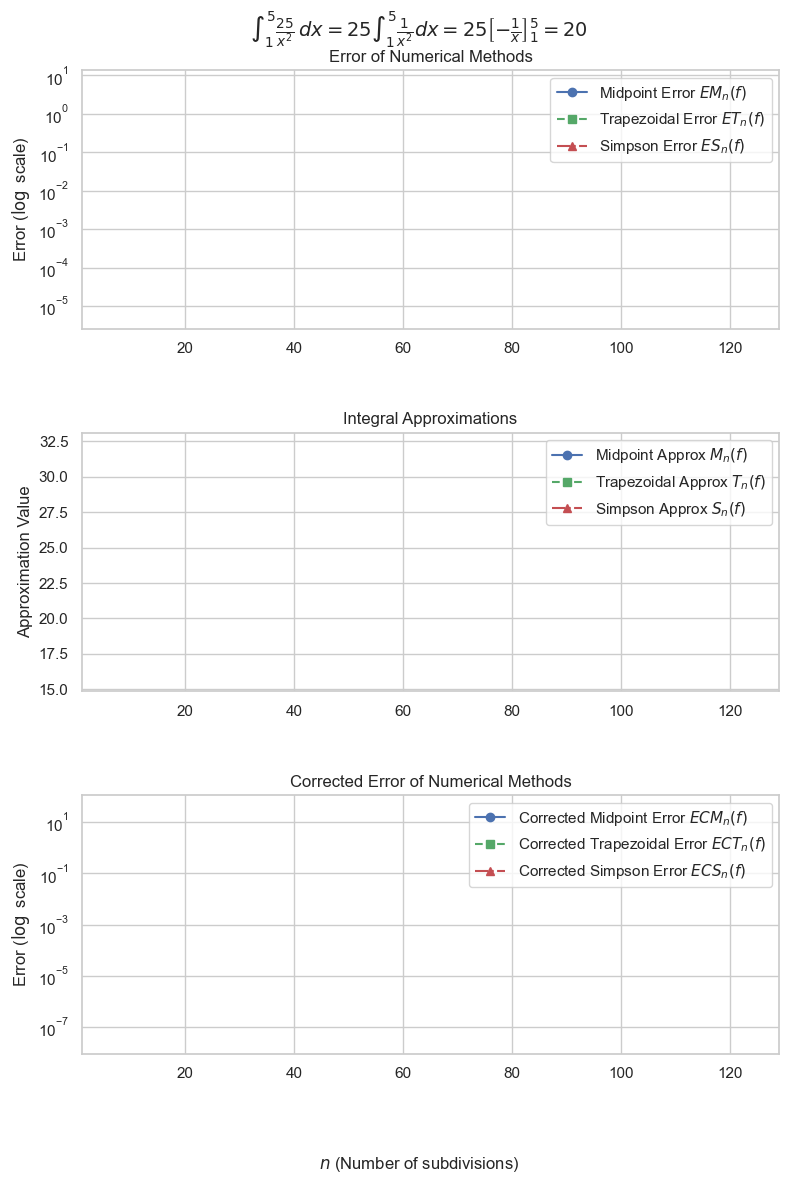

In [36]:
sns.set_theme(style="whitegrid")

error_mid_apx = problem_2_table['Exact $EM_n(f)$'].values
error_trap_apx = problem_3_table['Exact $ET_n(f)$'].values
error_simp_apx = problem_4_table['Exact $ES_n(f)$'].values

error_corrected_mid_apx = problem_2_table['Exact $ECM_n(f)$'].values
error_corrected_trap_apx = problem_3_table['Exact $ECT_n(f)$'].values
error_corrected_simp_apx = problem_4_table['Exact $ECS_n(f)$'].values

mid_apx = problem_2_table['$M_n(f)$'].values
trap_apx = problem_3_table['$T_n(f)$'].values
simp_apx = problem_4_table['$S_n(f)$'].values

n = problem_2_table['n'].values

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(9, 12))
fig.suptitle(r"$\int_1^5 \frac{25}{x^2}\,dx = 25\int_1^5 \frac{1}{x^2}dx = 25\left[-\frac{1}{x}\right]_1^5 = 20$", fontsize=14)
fig.subplots_adjust(top=0.93, hspace=0.4)

fig.supxlabel(r'$n$ (Number of subdivisions)', fontsize=12)

mid_line_err, = ax1.plot([], [], label="Midpoint Error $EM_n(f)$", marker='o', linestyle='-', color='b')
trap_line_err, = ax1.plot([], [], label="Trapezoidal Error $ET_n(f)$", marker='s', linestyle='--', color='g')
simp_line_err, = ax1.plot([], [], label="Simpson Error $ES_n(f)$", marker='^', linestyle='-.', color='r')

mid_line_apx, = ax2.plot([], [], label="Midpoint Approx $M_n(f)$", marker='o', linestyle='-', color='b')
trap_line_apx, = ax2.plot([], [], label="Trapezoidal Approx $T_n(f)$", marker='s', linestyle='--', color='g')
simp_line_apx, = ax2.plot([], [], label="Simpson Approx $S_n(f)$", marker='^', linestyle='-.', color='r')

mid_line_err_corrected, = ax3.plot([], [], label="Corrected Midpoint Error $ECM_n(f)$", marker='o', linestyle='-', color='b')
trap_line_err_corrected, = ax3.plot([], [], label="Corrected Trapezoidal Error $ECT_n(f)$", marker='s', linestyle='--', color='g')
simp_line_err_corrected, = ax3.plot([], [], label="Corrected Simpson Error $ECS_n(f)$", marker='^', linestyle='-.', color='r')

ax1.set_xlim(min(n) - 1, max(n) + 1)
ax1.set_ylim(min(min(error_mid_apx), min(error_trap_apx), min(error_simp_apx)) * 0.8,
             max(max(error_mid_apx), max(error_trap_apx), max(error_simp_apx)) * 1.2)
ax1.set_yscale('log')
ax1.set_ylabel(r'Error ($\log$ scale)')
ax1.set_title('Error of Numerical Methods')
ax1.legend()

ax2.set_xlim(min(n) - 1, max(n) + 1)
ax2.set_ylim(min(min(mid_apx), min(trap_apx), min(simp_apx)) * 0.95,
             max(max(mid_apx), max(trap_apx), max(simp_apx)) * 1.05)
ax2.set_ylabel('Approximation Value')
ax2.set_title('Integral Approximations')
ax2.legend()

ax3.set_xlim(min(n) - 1, max(n) + 1)
ax3.set_ylim(min(min(error_corrected_mid_apx), min(error_corrected_trap_apx), min(error_corrected_simp_apx)) * 0.8,
             max(max(error_corrected_mid_apx), max(error_corrected_trap_apx), max(error_corrected_simp_apx)) * 1.2)
ax3.set_yscale('log')
ax3.set_ylabel(r'Error ($\log$ scale)')
ax3.set_title('Corrected Error of Numerical Methods')
ax3.legend()


In [37]:
def update(frame):
    mid_line_err.set_data(n[:frame + 1], error_mid_apx[:frame + 1])
    trap_line_err.set_data(n[:frame + 1], error_trap_apx[:frame + 1])
    simp_line_err.set_data(n[:frame + 1], error_simp_apx[:frame + 1])

    mid_line_apx.set_data(n[:frame + 1], mid_apx[:frame + 1])
    trap_line_apx.set_data(n[:frame + 1], trap_apx[:frame + 1])
    simp_line_apx.set_data(n[:frame + 1], simp_apx[:frame + 1])

    mid_line_err_corrected.set_data(n[:frame + 1], error_corrected_mid_apx[:frame + 1])
    trap_line_err_corrected.set_data(n[:frame + 1], error_corrected_trap_apx[:frame + 1])
    simp_line_err_corrected.set_data(n[:frame + 1], error_corrected_simp_apx[:frame + 1])

    return (mid_line_err, trap_line_err, simp_line_err,
            mid_line_apx, trap_line_apx, simp_line_apx,
            mid_line_err_corrected, trap_line_err_corrected, simp_line_err_corrected)


In [38]:
ani = FuncAnimation(fig, update, frames=len(n), interval=500, blit=True)
HTML(ani.to_jshtml())